In [2]:
import cv2
import matplotlib.pyplot as plt

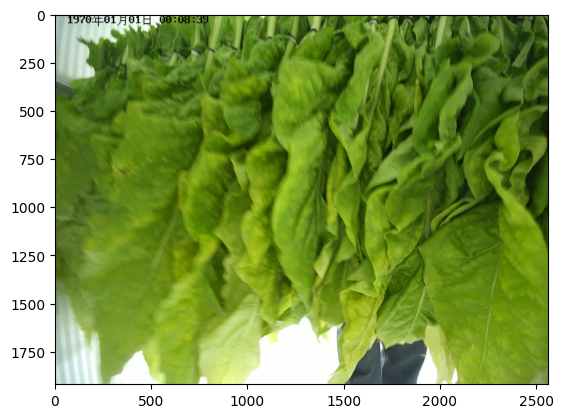

In [3]:
# filename = '/home/llj/code/test/data/20230611/000413_ch01.jpg'
filename = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
img = cv2.imread(filename, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(img)
plt.show()

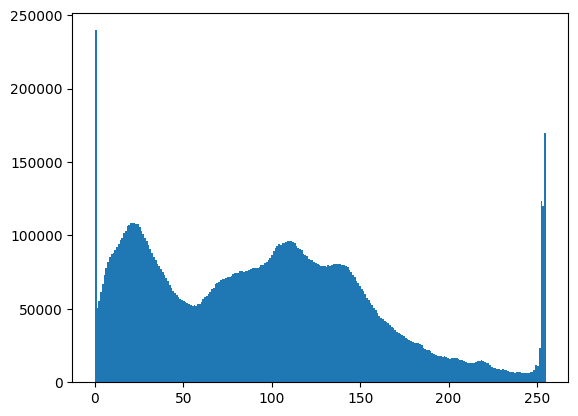

In [4]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

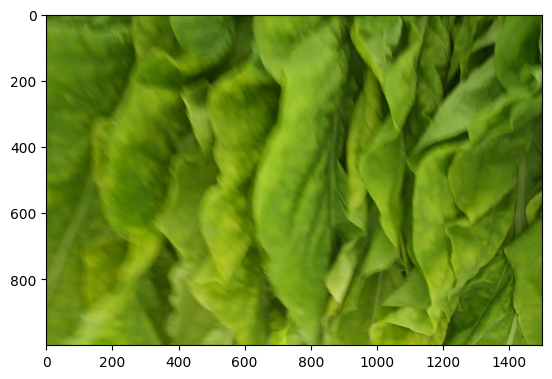

In [5]:
x = 500
y = 500
w = 1000
h = 1500
img = img[x:x + w, y:y + h]
plt.imshow(img)
plt.show()

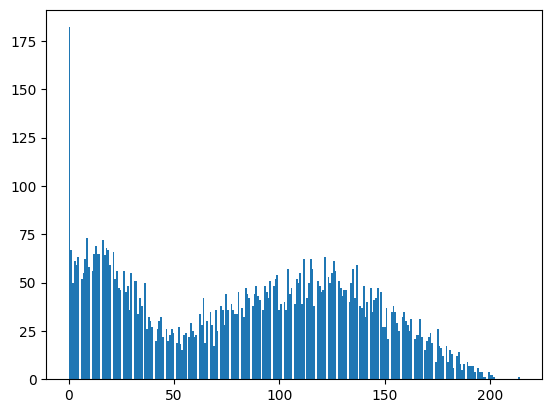

In [6]:
size = (50,50)
img = cv2.resize(img,size)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.hist(img.ravel(),256)
plt.show()

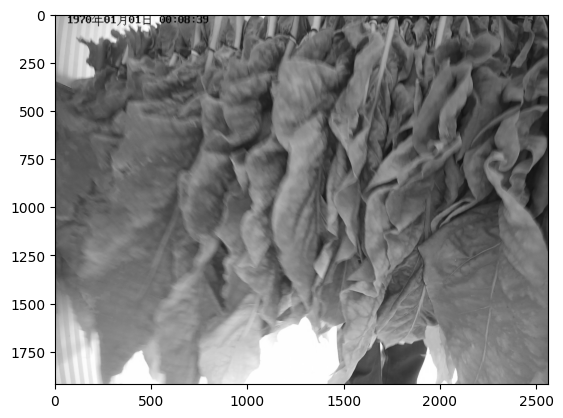

In [7]:
import cv2
import matplotlib.pyplot as plt
filename = '/home/llj/code/test/data/20230610/110917_ch01.jpg'
img = cv2.imread(filename, 1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

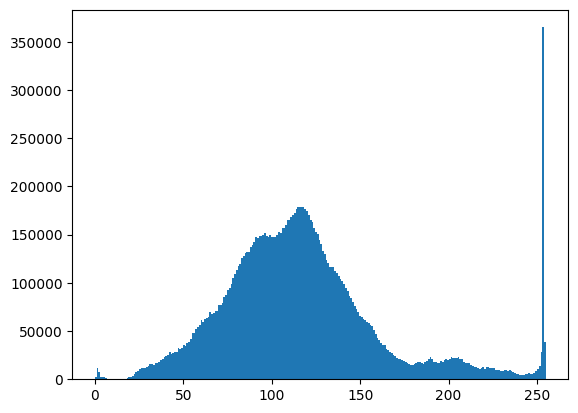

In [8]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

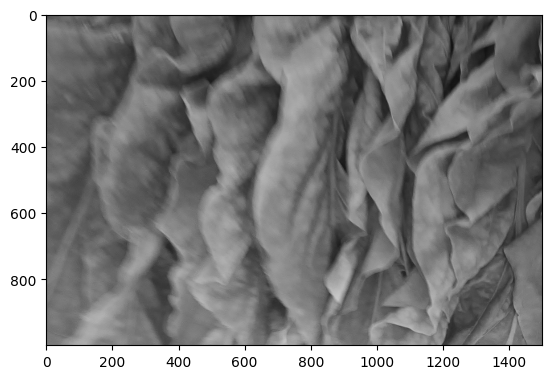

In [9]:
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
plt.imshow(gray)
plt.show()

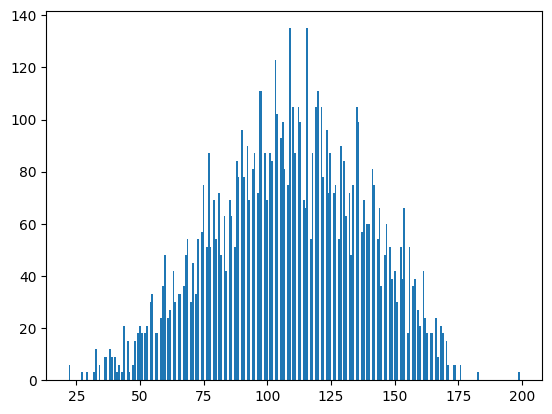

In [10]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

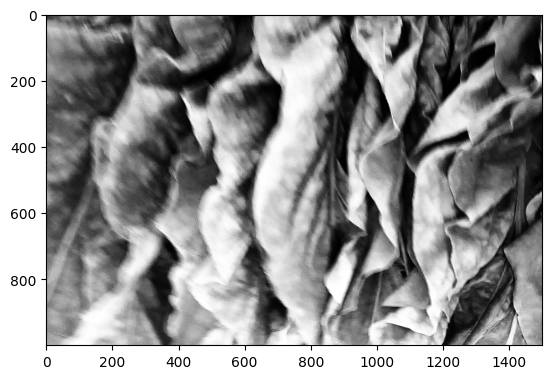

In [26]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#变成黑白
x = 500
y = 500
w = 1000
h = 1500
gray = gray[x:x + w, y:y + h]
gray = cv2.equalizeHist(gray)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)  # CV BGR转变RGB
plt.imshow(gray)
plt.show()

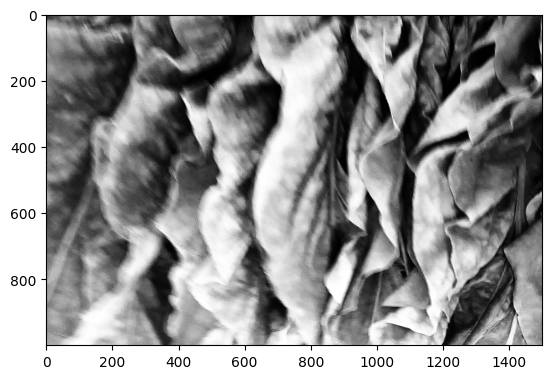

In [27]:
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
plt.imshow(gray)
plt.show()
# cv2.imshow('color_image', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

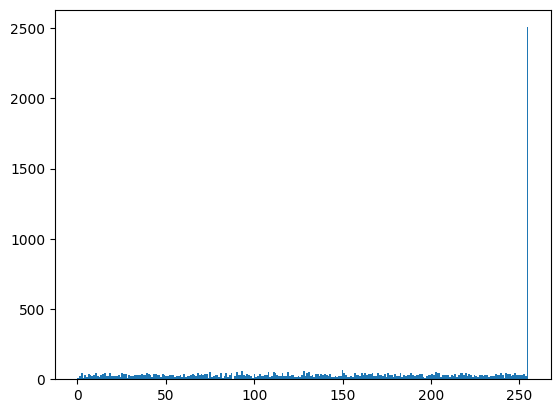

In [16]:
size = (50,50)
gray = cv2.resize(gray,size)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.hist(gray.ravel(),256)
plt.show()

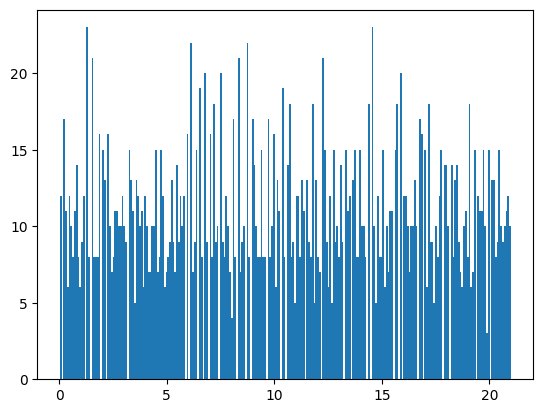

In [14]:
import numpy as np
# 计算累积分布函数
cdf = hist.cumsum()
# 计算均衡化后的像素值
cdf_normalized = cdf * hist.max() / cdf.max()

# 获取均衡化后的图像
equalized_image = np.interp(gray.flatten(), np.arange(256), cdf_normalized).reshape(gray.shape)

plt.hist(equalized_image.ravel(),256)
plt.show()